In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [12]:
df = pd.read_csv("https://raw.githubusercontent.com/aishwaryamate/Datasets/main/Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [13]:
x = df.iloc[:,3:-1]
y = df["Exited"]

In [18]:
oe = OrdinalEncoder()

x.loc[:,"Geography":"Gender"] = oe.fit_transform(df.loc[:,"Geography":"Gender"])
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [19]:
sc = StandardScaler()

x = sc.fit_transform(x)

In [20]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2, random_state = 19)

In [23]:
ann = Sequential()
ann.add(Dense(units = 50, activation = "relu"))
ann.add(Dense(units = 40, activation = "relu"))
ann.add(Dense(units = 1, activation = "sigmoid"))
ann.compile(optimizer = "adam", loss = "binary_crossentropy")
ann.fit(xtrain, ytrain, validation_data = (xtest,ytest), epochs = 100)

Epoch 1/100
250/250 [==============================] - 8s 6ms/step - loss: 0.4719 - val_loss: 0.4209
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4010 - val_loss: 0.3855
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3690 - val_loss: 0.3593
Epoch 4/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3537 - val_loss: 0.3539
Epoch 5/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3460 - val_loss: 0.3471
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3424 - val_loss: 0.3479
Epoch 7/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3393 - val_loss: 0.3444
Epoch 8/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3357 - val_loss: 0.3470
Epoch 9/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3332 - val_loss: 0.3422
Epoch 10/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3310 - val_lo

250/250 [==============================] - 1s 3ms/step - loss: 0.2693 - val_loss: 0.3943
Epoch 82/100
250/250 [==============================] - 1s 3ms/step - loss: 0.2695 - val_loss: 0.3876
Epoch 83/100
250/250 [==============================] - 1s 3ms/step - loss: 0.2677 - val_loss: 0.3952
Epoch 84/100
250/250 [==============================] - 1s 4ms/step - loss: 0.2680 - val_loss: 0.3866
Epoch 85/100
250/250 [==============================] - 1s 4ms/step - loss: 0.2679 - val_loss: 0.3945
Epoch 86/100
250/250 [==============================] - 1s 3ms/step - loss: 0.2652 - val_loss: 0.3954
Epoch 87/100
250/250 [==============================] - 1s 3ms/step - loss: 0.2650 - val_loss: 0.3893
Epoch 88/100
250/250 [==============================] - 1s 3ms/step - loss: 0.2644 - val_loss: 0.3952
Epoch 89/100
250/250 [==============================] - 1s 3ms/step - loss: 0.2653 - val_loss: 0.3948
Epoch 90/100
250/250 [==============================] - 1s 3ms/step - loss: 0.2637 - val_loss: 

<AxesSubplot:>

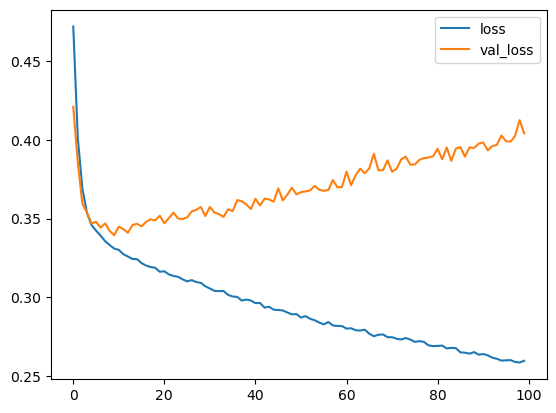

In [28]:
val_loss = pd.DataFrame(ann.history.history)
val_loss.plot()

In [29]:
early = EarlyStopping(monitor = "val_loss", mode = "min", patience = 20)

In [30]:
ann = Sequential()
ann.add(Dense(units = 50, activation = "relu"))
ann.add(Dense(units = 40, activation = "relu"))
ann.add(Dense(units = 1, activation = "sigmoid"))
ann.compile(optimizer = "adam", loss = "binary_crossentropy")
ann.fit(xtrain, ytrain, validation_data = (xtest,ytest), callbacks = early, epochs = 100)

Epoch 1/100
250/250 [==============================] - 3s 6ms/step - loss: 0.4639 - val_loss: 0.4024
Epoch 2/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3878 - val_loss: 0.3680
Epoch 3/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3631 - val_loss: 0.3514
Epoch 4/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3528 - val_loss: 0.3551
Epoch 5/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3466 - val_loss: 0.3497
Epoch 6/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3428 - val_loss: 0.3442
Epoch 7/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3403 - val_loss: 0.3509
Epoch 8/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3366 - val_loss: 0.3457
Epoch 9/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3333 - val_loss: 0.3463
Epoch 10/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3316 - val_lo

<AxesSubplot:>

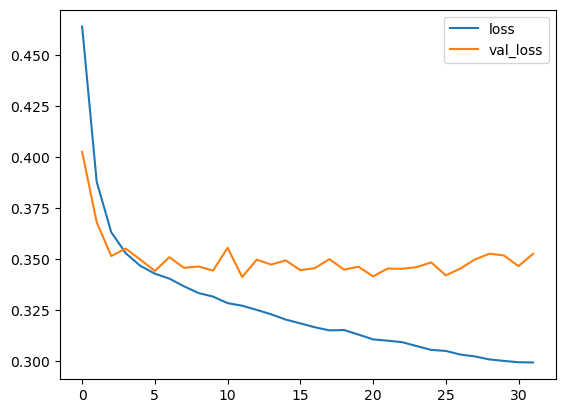

In [45]:
early_loss = pd.DataFrame(ann.history.history)
early_loss.plot()

In [43]:
rnn = Sequential()

rnn.add(Dense(units = 30, activation = "relu"))
rnn.add(Dropout(rate = 0.5))

rnn.add(Dense(units = 24, activation = "relu"))
rnn.add(Dropout(rate = 0.5))

rnn.add(Dense(units = 1, activation = "sigmoid"))

rnn.compile(optimizer = "adam", loss = "binary_crossentropy")

rnn.fit(xtrain, ytrain, validation_data = (xtest, ytest), epochs = 250)

Epoch 1/250
250/250 [==============================] - 3s 5ms/step - loss: 0.5782 - val_loss: 0.4545
Epoch 2/250
250/250 [==============================] - 1s 4ms/step - loss: 0.4931 - val_loss: 0.4404
Epoch 3/250
250/250 [==============================] - 1s 4ms/step - loss: 0.4730 - val_loss: 0.4339
Epoch 4/250
250/250 [==============================] - 1s 4ms/step - loss: 0.4678 - val_loss: 0.4299
Epoch 5/250
250/250 [==============================] - 1s 4ms/step - loss: 0.4532 - val_loss: 0.4268
Epoch 6/250
250/250 [==============================] - 1s 4ms/step - loss: 0.4504 - val_loss: 0.4173
Epoch 7/250
250/250 [==============================] - 1s 4ms/step - loss: 0.4383 - val_loss: 0.4108
Epoch 8/250
250/250 [==============================] - 1s 4ms/step - loss: 0.4376 - val_loss: 0.4041
Epoch 9/250
250/250 [==============================] - 1s 4ms/step - loss: 0.4271 - val_loss: 0.3943
Epoch 10/250
250/250 [==============================] - 1s 4ms/step - loss: 0.4233 - val_lo

250/250 [==============================] - 1s 4ms/step - loss: 0.3652 - val_loss: 0.3503
Epoch 82/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3738 - val_loss: 0.3514
Epoch 83/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3688 - val_loss: 0.3520
Epoch 84/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3640 - val_loss: 0.3506
Epoch 85/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3670 - val_loss: 0.3515
Epoch 86/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3734 - val_loss: 0.3536
Epoch 87/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3701 - val_loss: 0.3515
Epoch 88/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3680 - val_loss: 0.3521
Epoch 89/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3701 - val_loss: 0.3507
Epoch 90/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3640 - val_loss: 

Epoch 161/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3628 - val_loss: 0.3516
Epoch 162/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3619 - val_loss: 0.3493
Epoch 163/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3666 - val_loss: 0.3507
Epoch 164/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3684 - val_loss: 0.3500
Epoch 165/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3626 - val_loss: 0.3491
Epoch 166/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3696 - val_loss: 0.3501
Epoch 167/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3699 - val_loss: 0.3486
Epoch 168/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3680 - val_loss: 0.3504
Epoch 169/250
250/250 [==============================] - 1s 5ms/step - loss: 0.3636 - val_loss: 0.3469
Epoch 170/250
250/250 [==============================] - 1s 4ms/step - lo

250/250 [==============================] - 1s 4ms/step - loss: 0.3602 - val_loss: 0.3493
Epoch 241/250
250/250 [==============================] - 1s 5ms/step - loss: 0.3629 - val_loss: 0.3480
Epoch 242/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3697 - val_loss: 0.3497
Epoch 243/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3635 - val_loss: 0.3458
Epoch 244/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3656 - val_loss: 0.3492
Epoch 245/250
250/250 [==============================] - 1s 5ms/step - loss: 0.3703 - val_loss: 0.3485
Epoch 246/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3658 - val_loss: 0.3487
Epoch 247/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3624 - val_loss: 0.3494
Epoch 248/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3643 - val_loss: 0.3503
Epoch 249/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3628 - v

<AxesSubplot:>

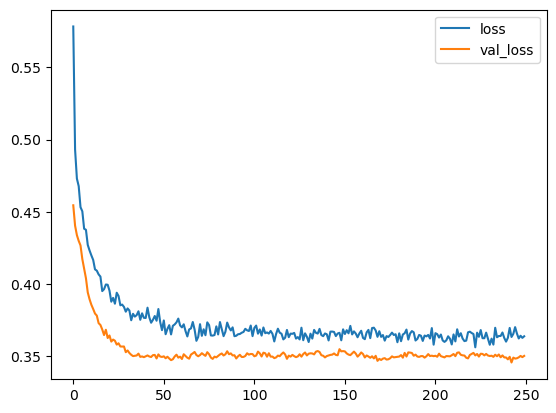

In [46]:
drop_loss = pd.DataFrame(rnn.history.history)
drop_loss.plot()

In [48]:
rnn = Sequential()

rnn.add(Dense(units = 30, activation = "relu"))
rnn.add(Dropout(rate = 0.5))

rnn.add(Dense(units = 24, activation = "relu"))
rnn.add(Dropout(rate = 0.5))

rnn.add(Dense(units = 1, activation = "sigmoid"))

rnn.compile(optimizer = "adam", loss = "binary_crossentropy")

rnn.fit(xtrain, ytrain, validation_data = (xtest, ytest), callbacks = early, epochs = 250)

Epoch 1/250
250/250 [==============================] - 3s 6ms/step - loss: 0.5535 - val_loss: 0.4523
Epoch 2/250
250/250 [==============================] - 1s 5ms/step - loss: 0.4864 - val_loss: 0.4351
Epoch 3/250
250/250 [==============================] - 1s 5ms/step - loss: 0.4729 - val_loss: 0.4239
Epoch 4/250
250/250 [==============================] - 1s 4ms/step - loss: 0.4529 - val_loss: 0.4139
Epoch 5/250
250/250 [==============================] - 1s 5ms/step - loss: 0.4456 - val_loss: 0.4079
Epoch 6/250
250/250 [==============================] - 1s 4ms/step - loss: 0.4377 - val_loss: 0.4004
Epoch 7/250
250/250 [==============================] - 1s 4ms/step - loss: 0.4292 - val_loss: 0.3957
Epoch 8/250
250/250 [==============================] - 1s 5ms/step - loss: 0.4299 - val_loss: 0.3938
Epoch 9/250
250/250 [==============================] - 1s 4ms/step - loss: 0.4236 - val_loss: 0.3868
Epoch 10/250
250/250 [==============================] - 1s 4ms/step - loss: 0.4258 - val_lo

<AxesSubplot:>

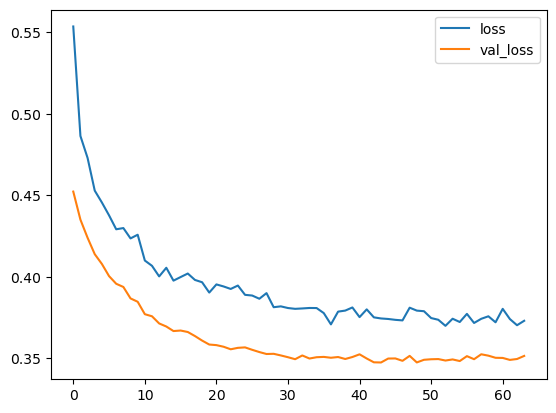

In [49]:
drop_early = pd.DataFrame(rnn.history.history)
drop_early.plot()

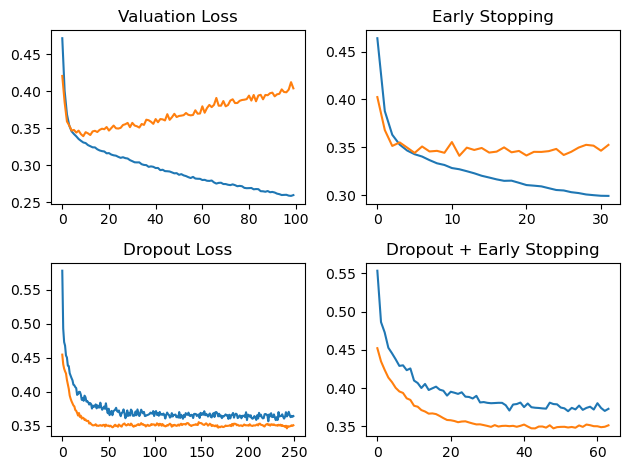

In [51]:
plt.subplot(2,2,1)
plt.plot(val_loss)
plt.title("Valuation Loss")

plt.subplot(2,2,2)
plt.plot(early_loss)
plt.title("Early Stopping")

plt.subplot(2,2,3)
plt.plot(drop_loss)
plt.title("Dropout Loss")

plt.subplot(2,2,4)
plt.plot(drop_early)
plt.title("Dropout + Early Stopping")

plt.tight_layout()